# Chapter 10. Machine Learning in Chemistry

## 10.4. Machine Learning Model Evaluation

Evaluating a machine learning model is necessary to measure its performance and assess how well it can generalize to unseen data.

### 10.4.1. Bias versus Variance

Bias refers to the error introduced by approximating a real-world problem with a simplified model. It is the model's tendency to consistently make assumptions that deviate from the true relationship between input features and the target variable.

Variance, on the other hand, refers to the model's sensitivity to fluctuations in the training data. It measures how much the predictions of the model vary for different training datasets.

In summary:
- Bias represents the model's systematic error or the assumptions it makes.
- Variance represents the model's inconsistency or sensitivity to training data fluctuations.
- **High bias** → **Underfit**
- **High variance** → **Overfit**

The bias-variance tradeoff:
![Bias-variance tradeoff](images/bias_variance_tradeoff.png)

### 10.4.2. Splitting Dataset

In order to evaluate a model, we have to split the dataset into 2 sets: train set and test set. The train dataset is used for training the model, and the test dataset is used for evaluation.
![Train-test split](images/train_test_split.png)

In training models with multiple iterations (e.g. ANN models). The dataset is usually splitted into 3 sets: train set, validation set, and test set. The validation dataset is used for monitoring the training process of the model in order to avoid underfitting and overfitting during training.
![Train-val-test split](images/train_val_test_split.png)

### 10.4.3. Evaluation Metrics of Machine Learning Models

#### 10.4.3.1. Regression Models

![Regression metrics](images/regression_metrics.JPG)

**Mean Absolute Error (MAE)**

MAE measures the average absolute difference between the predicted and actual values, providing a linear scale of errors. 

**Mean Squared Error (MSE)**

MSE measures the average squared difference between the predicted and actual values, giving higher weight to larger errors.

**Root Mean Squared Error (RMSE)**

RMSE is the square root of MSE, providing an interpretable scale that matches the target variable.

**R<sup>2</sup> (Coefficient of Determination)**

R<sup>2</sup> represents the proportion of the variance in the target variable that can be explained by the model.

#### 10.4.3.2. Classification Models

![Classification metrics](images/classification_metrics.jpg)

**Confusion Matrix**

Confusion matrix Provides a tabular summary of the predicted versus actual class labels, allowing for the calculation of various metrics such as true positives, true negatives, false positives, and false negatives.

**Accuracy**

Accuracy measures the proportion of correctly classified instances.

**Precision**

Precision evaluates the ratio of true positive predictions to the total predicted positives, indicating the model's ability to correctly identify positive instances.

**Recall (Sensitivity)**

Recall (or sensitivity) measures the ratio of true positive predictions to the total actual positives, indicating the model's ability to correctly identify positive instances.

**F1-Score**

F1-score combines precision and recall into a single metric that considers both the false positives and false negatives.

## 10.5. Machine Learning Models

We will explorer several common machine learning models that are available in `scikit-learn` library.

To install `scikit-learn`, run the following command:

In [ ]:
!conda install -c anaconda scikit-learn 

### 10.5.1. Regression Models

In the following sections, will we evaluate different regression models to predict the lipophilicity of chemical compounds:

***a. Import modules***

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors

***b. Load dataset***

In [2]:
# Load the lipophilicity dataset
data_file_path = '.\\datasets\\Lipophilicity.csv'
df = pd.read_csv(data_file_path)
df.head()

,smiles,lipophilicity
0,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,3.54
1,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,-1.18
2,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,3.69
3,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...,3.37
4,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...,3.10


In [3]:
# Get the list of SMILES
smiles_arr = df['smiles'].to_numpy()

# Get the output
y = df['lipophilicity'].to_numpy()

***c. Extraction features from molecules***

In [4]:
# Define a function to extract a list of features from a molecule
def extract_features(mol):
    features = []
    features.append(Descriptors.MolWt(mol))          # molecular weight
    features.append(Descriptors.NumHeteroatoms(mol)) # number of heteroatoms
    features.append(Descriptors.RingCount(mol))      # number of rings
    features.append(Descriptors.NumHAcceptors(mol))  # number of hydrogen bond donor
    features.append(Descriptors.NumHDonors(mol))     # number of hydrogen bond accepter
    features.append(Descriptors.FractionCSP3(mol))   # fraction of SP3-hybridized carbons
    features.append(Descriptors.TPSA(mol))           # topological polar surface area
    features.append(Descriptors.MolLogP(mol))        # partition coefficient
    features.append(Descriptors.MolMR(mol))          # molar refractivity
    
    return features

In [5]:
# Create the list of features for molecules
x = []

# Loop through the SMILES list
pbar = tqdm(range(len(smiles_arr)))
for i in pbar:
    # Get the SMILES for each molecule
    smiles = smiles_arr[i]
    
    # Create a molecule object from the SMILES
    mol = Chem.MolFromSmiles(smiles)
    
    # Get descriptors
    features = extract_features(mol)
    x.append(features)
    
    # Print progress
    pbar.set_description('{}/{} molecules processed |'.format(i + 1, len(smiles_arr)))
    
# Convert list to numpy array
x = np.array(x)

4200/4200 molecules processed |: 100%|████████████████████████████████████████████| 4200/4200 [00:05<00:00, 761.86it/s]


***d. Data processing***

In [6]:
# Set the random seed
random_seed = 0
np.random.seed(random_seed)

In [7]:
# Define input and output scalers
input_scaler = MinMaxScaler(feature_range=(0, 1))
output_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data
x_scaled = input_scaler.fit_transform(x)
y_scaled = output_scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

In [8]:
# Split the data into training and testing sets
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=random_seed)

***e. Model training and evaluation***

#### 10.5.1.1. Linear Regression

Linear regression is a fundamental approach that models the linear relationship between a dependent variable and one or more independent variables.

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(x_test_scaled)

# Transform predictions back to original scale
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).reshape(-1)

# Transform the test set back to original scale
y_test = output_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(-1)

In [10]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.8301
Mean Squared Error (MSE): 1.0928
Root Mean Squared Error (RMSE): 1.0454
R^2 Score: 0.2230


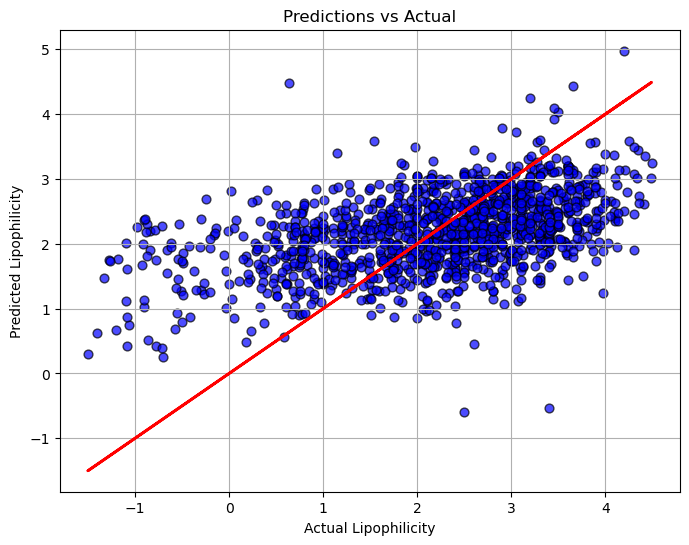

In [11]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=40)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Ideal line for perfect predictions
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Predictions vs Actual')
plt.grid(True)
plt.show()

After training, we can make predictions with this model, for examples:

In [12]:
# Define a new molecule
mol = Chem.MolFromSmiles('CCO') # ethanol

# Extract features
features = extract_features(mol)
features = np.array(features)

# Scale features
features_scaled = input_scaler.transform(features.reshape(1, -1))

# Make prediction
output_scaled = model.predict(features_scaled)

# Transform predictions back to original scale
output = output_scaler.inverse_transform(output_scaled.reshape(-1, 1)).reshape(-1)

# Print out the prediction
print(output[0])

0.4355396066643865


#### 10.5.1.2. Ridge Regression

Ridge regression extends linear regression by adding a regularization term, which helps in reducing model complexity and preventing overfitting.

In [13]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
# You can adjust the alpha parameter to control the amount of regularization
model = Ridge(alpha=1.0)

# Train the model on the training data
model.fit(x_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(x_test_scaled)

# Transform predictions back to original scale
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).reshape(-1)

# Transform the test set back to original scale
y_test = output_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(-1)

In [14]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.8270
Mean Squared Error (MSE): 1.0860
Root Mean Squared Error (RMSE): 1.0421
R^2 Score: 0.2279


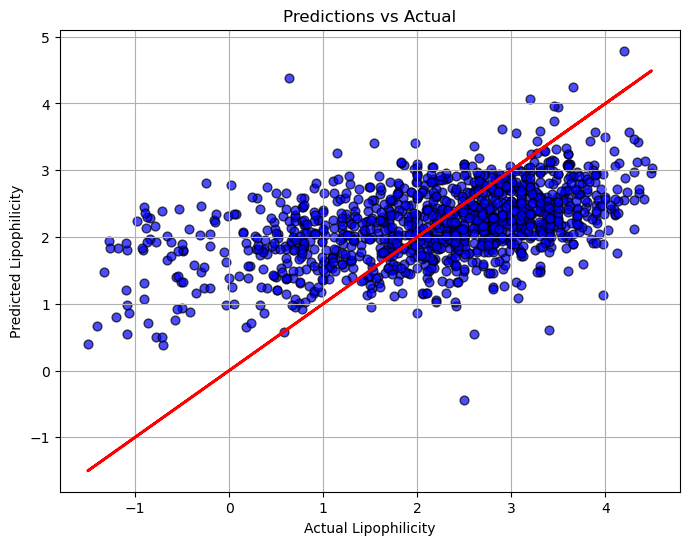

In [15]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=40)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Ideal line for perfect predictions
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Predictions vs Actual')
plt.grid(True)
plt.show()

#### 10.5.1.3. Lasso Regression

Lasso regression, similar to ridge regression, adds a regularization term but in a way that can completely eliminate the weights of some features, thus performing feature selection.

In [16]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
# You can adjust the alpha parameter to control the amount of regularization
model = Lasso(alpha=0.01)

# Train the model on the training data
model.fit(x_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(x_test_scaled)

# Transform predictions back to original scale
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).reshape(-1)

# Transform the test set back to original scale
y_test = output_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(-1)

In [17]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.9524
Mean Squared Error (MSE): 1.4067
Root Mean Squared Error (RMSE): 1.1861
R^2 Score: -0.0002


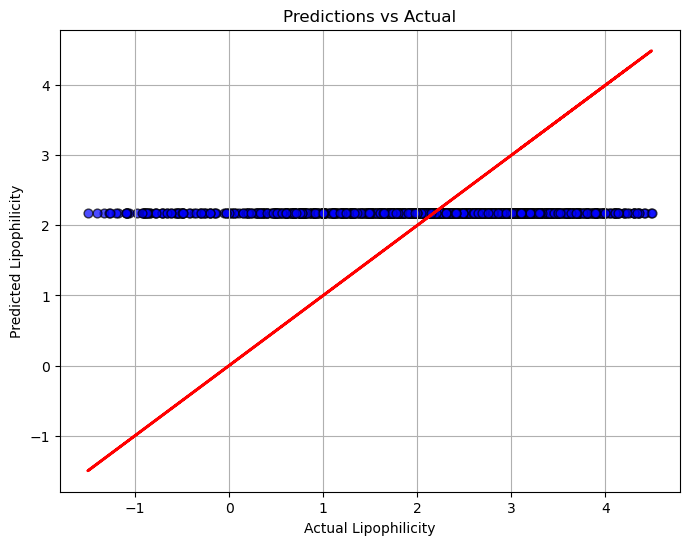

In [18]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=40)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Ideal line for perfect predictions
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Predictions vs Actual')
plt.grid(True)
plt.show()

#### 10.5.1.4. Elastic Net

Elastic net combines features of both ridge and lasso regression, using a mix of both L1 and L2 regularization to improve model robustness.

In [19]:
from sklearn.linear_model import ElasticNet

# Initialize the Elastic Net model
# You can adjust the alpha and l1_ratio parameters to control the amount of regularization
# alpha controls the overall strength, while l1_ratio controls the balance between L1 and L2 regularization
model = ElasticNet(alpha=0.01, l1_ratio=0.5)

# Train the model on the training data
model.fit(x_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(x_test_scaled)

# Transform predictions back to original scale
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).reshape(-1)

# Transform the test set back to original scale
y_test = output_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(-1)

In [20]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.9284
Mean Squared Error (MSE): 1.3330
Root Mean Squared Error (RMSE): 1.1546
R^2 Score: 0.0523


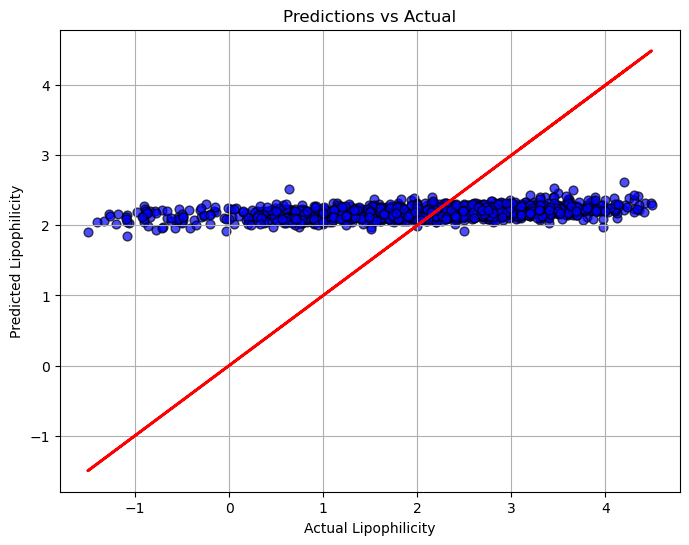

In [21]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=40)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Ideal line for perfect predictions
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Predictions vs Actual')
plt.grid(True)
plt.show()

#### 10.5.1.5. K-Nearest Neighbors Regression

KNN regression predicts the output based on the K nearest neighbors in the feature space, averaging their values to determine the final prediction.

In [22]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN regression model
# You can adjust the number of neighbors (n_neighbors)
model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
model.fit(x_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(x_test_scaled)

# Transform predictions back to original scale
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).reshape(-1)

# Transform the test set back to original scale
y_test = output_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(-1)

In [23]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.7339
Mean Squared Error (MSE): 0.9486
Root Mean Squared Error (RMSE): 0.9740
R^2 Score: 0.3256


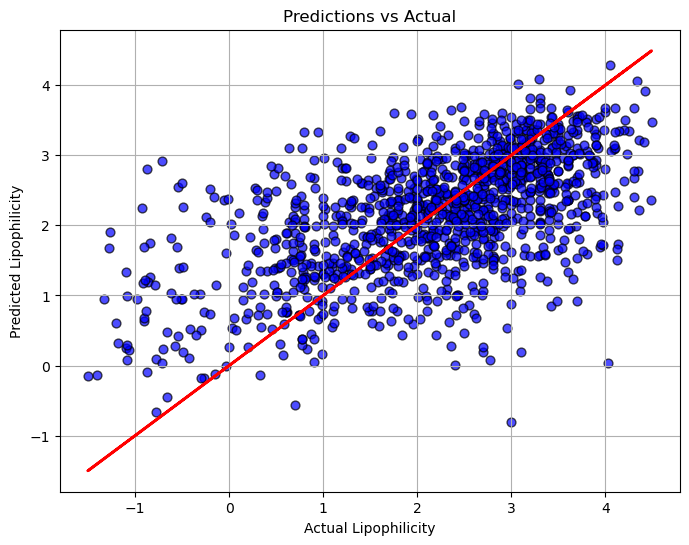

In [24]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=40)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Ideal line for perfect predictions
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Predictions vs Actual')
plt.grid(True)
plt.show()

#### 10.5.1.6. Decision Tree Regression

Decision tree regression models make predictions by splitting data into subsets based on feature values, building a tree-like model of decisions.

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regression model
# You can adjust various parameters like max_depth, min_samples_split, etc.
model = DecisionTreeRegressor(max_depth=5)

# Train the model on the training data
model.fit(x_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(x_test_scaled)

# Transform predictions back to original scale
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).reshape(-1)

# Transform the test set back to original scale
y_test = output_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(-1)

In [26]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.7880
Mean Squared Error (MSE): 1.0041
Root Mean Squared Error (RMSE): 1.0020
R^2 Score: 0.2861


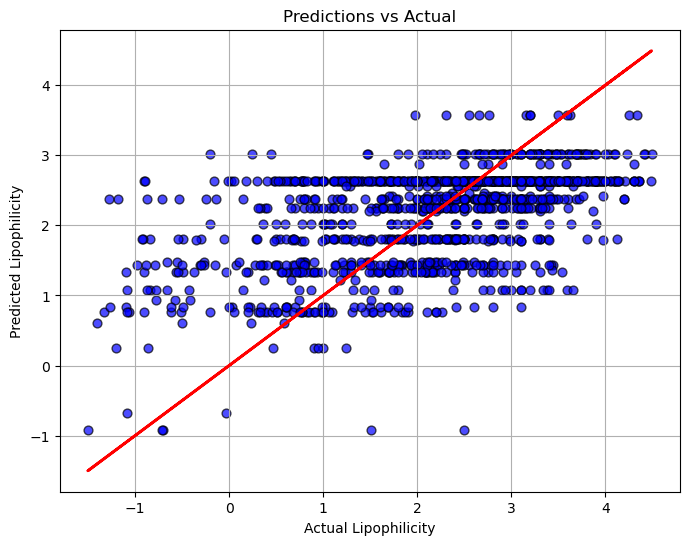

In [27]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=40)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Ideal line for perfect predictions
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Predictions vs Actual')
plt.grid(True)
plt.show()

#### 10.5.1.7. Random Forest Regression

Random forest regression improves upon decision tree regression by creating an ensemble of decision trees and averaging their predictions to reduce overfitting.

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regression model
# You can adjust parameters like n_estimators (number of trees), max_depth, etc.
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=random_seed)

# Train the model on the training data
model.fit(x_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(x_test_scaled)

# Transform predictions back to original scale
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).reshape(-1)

# Transform the test set back to original scale
y_test = output_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(-1)

In [29]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.7677
Mean Squared Error (MSE): 0.9452
Root Mean Squared Error (RMSE): 0.9722
R^2 Score: 0.3279


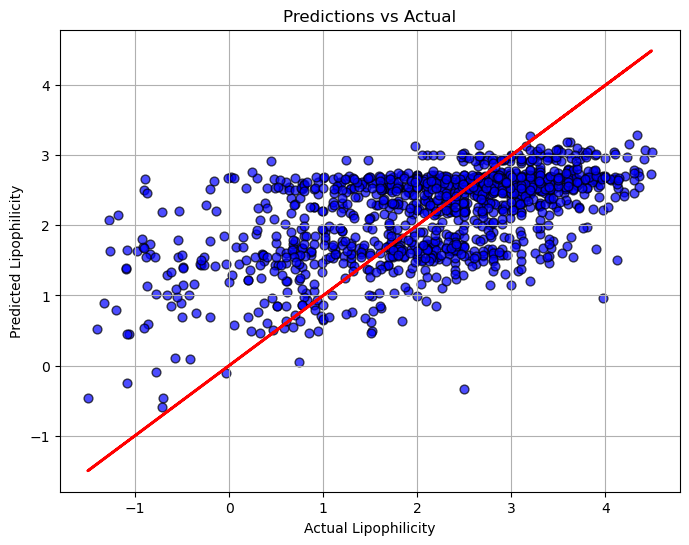

In [30]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=40)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Ideal line for perfect predictions
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Predictions vs Actual')
plt.grid(True)
plt.show()

#### 10.5.1.8. Gaussian Process Regression

Gaussian process regression is a probabilistic model that uses kernel functions to make predictions, providing not only estimations but also uncertainty measures.

In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# Initialize the Gaussian Process Regressor model
# You can adjust the kernel and other parameters as needed
kernel = DotProduct() + WhiteKernel()
model = GaussianProcessRegressor(kernel=kernel, random_state=random_seed)

# Train the model on the training data
model.fit(x_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(x_test_scaled)

# Transform predictions back to original scale
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).reshape(-1)

# Transform the test set back to original scale
y_test = output_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(-1)

In [32]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.8291
Mean Squared Error (MSE): 1.0909
Root Mean Squared Error (RMSE): 1.0444
R^2 Score: 0.2244


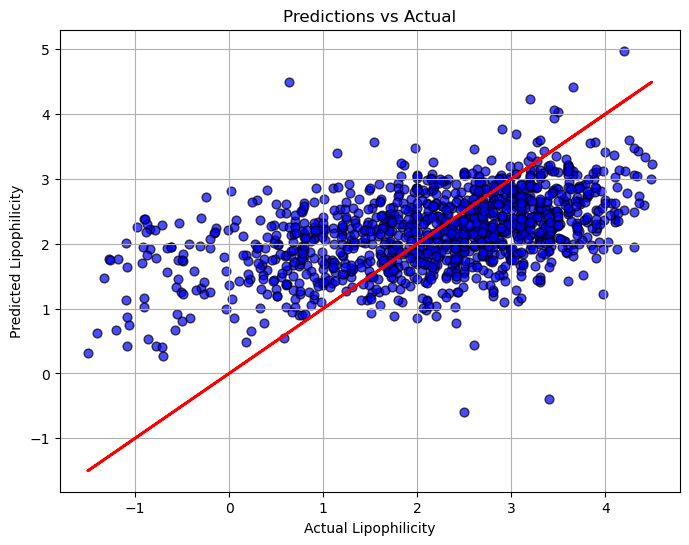

In [33]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=40)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Ideal line for perfect predictions
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Predictions vs Actual')
plt.grid(True)
plt.show()

#### 10.5.1.9. Support Vector Machine (SVM) Regression

SVM regression, or Support Vector Regression (SVR), uses the SVM technique to model complex relationships between features and target variables, including both linear and non-linear interactions.

In [34]:
from sklearn.svm import SVR

# Initialize the SVM Regression model with a Gaussian (RBF) kernel
# You can adjust parameters like C (regularization parameter) and gamma (kernel coefficient)
model = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)

# Train the model on the training data
model.fit(x_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = model.predict(x_test_scaled)

# Transform predictions back to original scale
y_pred = output_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).reshape(-1)

# Transform the test set back to original scale
y_test = output_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(-1)

In [35]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.7561
Mean Squared Error (MSE): 0.9442
Root Mean Squared Error (RMSE): 0.9717
R^2 Score: 0.3287


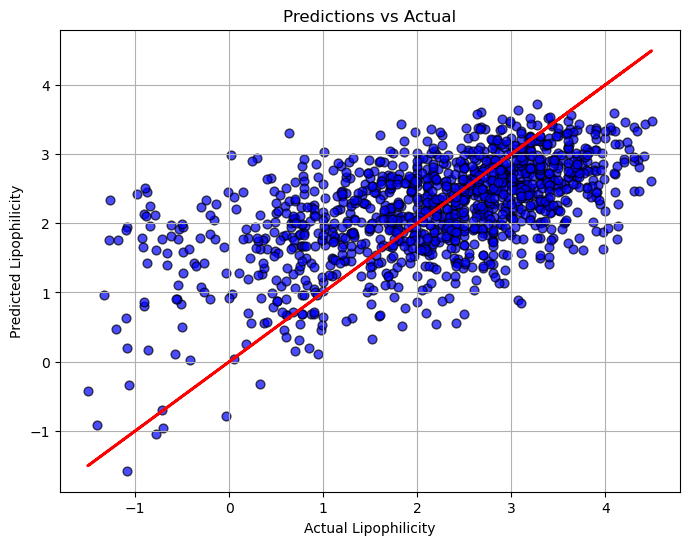

In [36]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=40)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Ideal line for perfect predictions
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Predictions vs Actual')
plt.grid(True)
plt.show()

### 10.5.2. Classification Models

In the following sections, will we evaluate different regression models to predict whether a compound is active toward β-secretase inhibitors:

***a. Import modules***

In [37]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors

***b. Load dataset***

In [38]:
# Load the lipophilicity dataset
data_file_path = '.\\datasets\\BBBP.csv'
df = pd.read_csv(data_file_path)
df.head()

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


In [39]:
# Get the list of SMILES
smiles_arr = df['smiles'].to_numpy()

# Get the output
y = df['p_np'].to_numpy()

***c. Extraction features from molecules***

In [40]:
# Define a function to extract a list of features from a molecule
def extract_features(mol):
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) # Morgan fingerprint
    features = np.array(morgan_fp)
    
    return features

In [41]:
# Create the list of features for molecules
x = []
output = []

# Loop through the SMILES list
pbar = tqdm(range(len(smiles_arr)))
for i in pbar:
    # Get the SMILES for each molecule
    smiles = smiles_arr[i]
    
    # Create a molecule object from the SMILES
    mol = Chem.MolFromSmiles(smiles)
    
    # Get descriptors
    try:
        features = extract_features(mol)
        x.append(features)
        output.append(y[i])
    except:
        continue
    
    # Print progress
    pbar.set_description('{}/{} molecules processed |'.format(i + 1, len(smiles_arr)))
    
# Convert list to numpy array
x = np.array(x)
y = np.array(output)

59/2050 molecules processed |:   0%|                                                          | 0/2050 [00:00<?, ?it/s][19:38:45] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:38:45] WARNING: not removing hydrogen atom without neighbors
61/2050 molecules processed |:   0%|                                                          | 0/2050 [00:00<?, ?it/s][19:38:45] Explicit valence for atom # 6 N, 4, is greater than permitted
127/2050 molecules processed |:   4%|█▋                                             | 76/2050 [00:00<00:02, 752.13it/s][19:38:45] WARNING: not removing hydrogen atom without neighbors
196/2050 molecules processed |:   7%|███▍                                          | 153/2050 [00:00<00:02, 756.11it/s][19:38:45] WARNING: not removing hydrogen atom without neighbors
223/2050 molecules processed |:   7%|███▍                                          | 153/2050 [00:00<00:02, 756.11it/s][19:38:45] WARNING: not removing hydrogen atom without neighbors

***d. Data processing***

In [42]:
# Set the random seed
random_seed = 0
np.random.seed(random_seed)

In [43]:
# Apply a variance threshold to remove input columns with only one value.
var_thresholder = VarianceThreshold(threshold=0.01)
x_var_thresh = var_thresholder.fit_transform(x)

# Define input scaler and scale input data
input_scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = input_scaler.fit_transform(x_var_thresh)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=32)
x_pca = pca.fit_transform(x_var_thresh)

In [44]:
# Split the data into training and testing sets
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=random_seed)

***e. Model training and evaluation***

#### 10.5.2.1. Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although there are extensions to handle multi-class problems.

In [45]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# You can adjust the 'C' parameter to control regularization strength
model = LogisticRegression(C=1.0, random_state=random_seed)

# Train the model on the training data
model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(x_test_scaled)

Accuracy: 0.8578
Precision: 0.8792
Recall: 0.9447
F1 Score: 0.9108


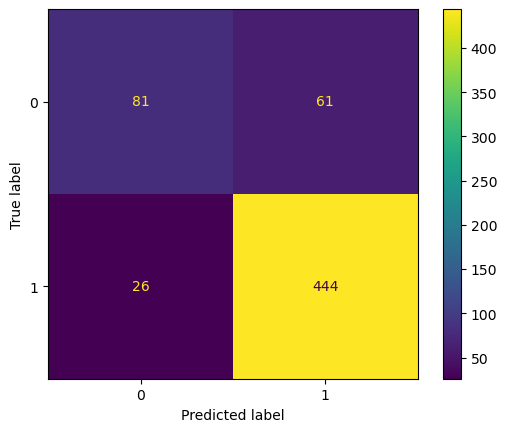

In [46]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#### 10.5.2.2. Naive Bayes

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong independence assumptions between the features.

In [47]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the training data
model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(x_test_scaled)

Accuracy: 0.8399
Precision: 0.8720
Recall: 0.9277
F1 Score: 0.8990


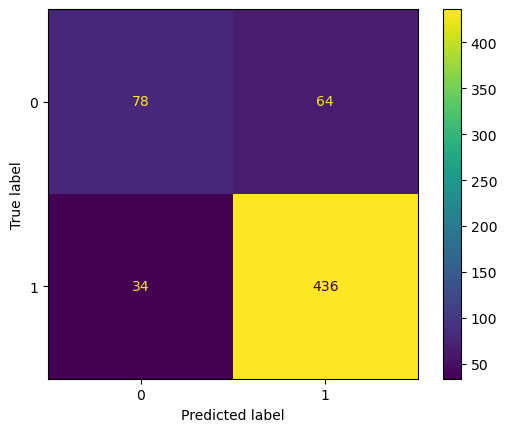

In [48]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#### 10.5.2.3. K-Nearest Neighbors (KNN)

KNN classification predicts the class of a data point based on the majority class among its k nearest neighbors. It's a simple, distance-based algorithm often used for its ease of interpretation.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
# You can adjust the number of neighbors (n_neighbors)
model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(x_test_scaled)

Accuracy: 0.8938
Precision: 0.9108
Recall: 0.9553
F1 Score: 0.9325


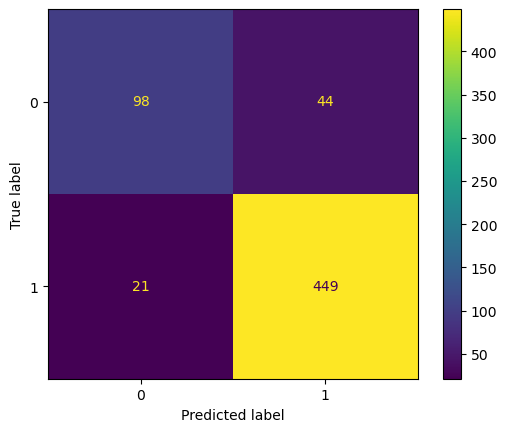

In [50]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#### 10.5.2.4. Decision Tree

Decision tree classifiers make decisions by splitting data based on feature values, creating a tree-like model of decisions. They are intuitive and easy to interpret but can be prone to overfitting.

In [51]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
# You can adjust parameters like max_depth, min_samples_split, etc.
model = DecisionTreeClassifier(max_depth=5, random_state=random_seed)

# Train the model on the training data
model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(x_test_scaled)

Accuracy: 0.8660
Precision: 0.8688
Recall: 0.9723
F1 Score: 0.9177


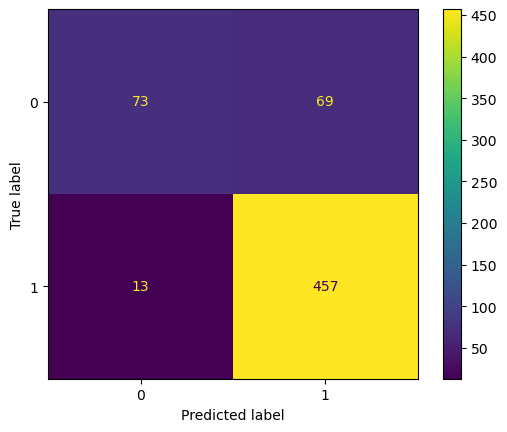

In [52]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#### 10.5.2.5. Random Forest

Random forest classifiers improve upon decision trees by creating an ensemble of decision trees and aggregating their predictions to reduce overfitting and improve prediction accuracy.

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
# You can adjust parameters like n_estimators (number of trees), max_depth, etc.
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=random_seed)

# Train the model on the training data
model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(x_test_scaled)

Accuracy: 0.8611
Precision: 0.8532
Recall: 0.9894
F1 Score: 0.9163


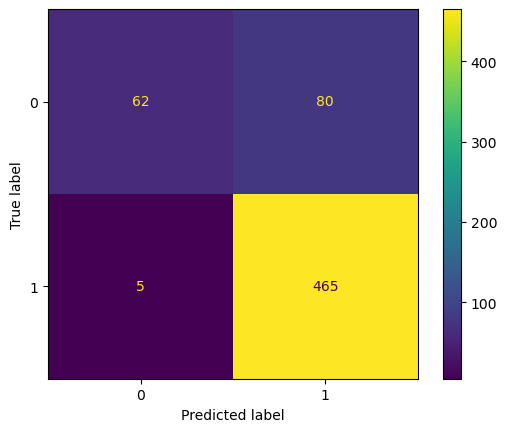

In [54]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#### 10.5.2.6. Gaussian Process Classifier

Gaussian Process classifiers extend Gaussian processes to classification tasks, using kernel functions and Bayesian inference to predict categorical outcomes, often with uncertainty estimates.

In [55]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Initialize the Gaussian Process Classifier
# The choice of kernel can be important; RBF is a common choice
kernel = 1.0 * RBF(1.0)
model = GaussianProcessClassifier(kernel=kernel, random_state=random_seed)

# Train the model on the training data
model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(x_test_scaled)

Accuracy: 0.8873
Precision: 0.9018
Recall: 0.9574
F1 Score: 0.9288


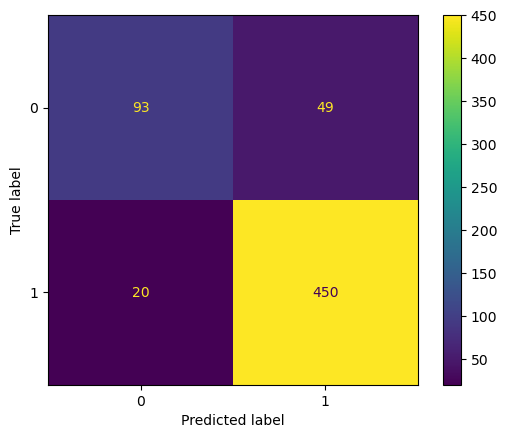

In [56]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#### 10.5.2.7. Support Vector Machine (SVM)

SVM classifiers construct hyperplanes in a multidimensional space to separate different classes with as wide a margin as possible. SVMs are effective in high-dimensional spaces and versatile with various kernel functions.

In [57]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a Gaussian (RBF) kernel
# You can adjust parameters like C (regularization parameter) and gamma (kernel coefficient)
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=random_seed)

# Train the model on the training data
model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(x_test_scaled)

Accuracy: 0.8873
Precision: 0.8878
Recall: 0.9766
F1 Score: 0.9301


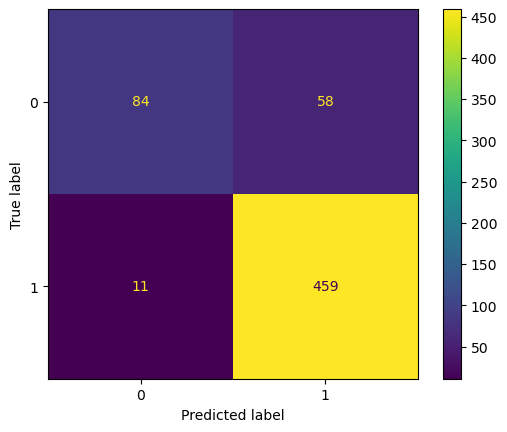

In [58]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()